# Cancer Diagnosis

In [1]:
# for result reproducibility
from numpy.random import seed
seed(42)
import tensorflow as tf
tf.random.set_seed(42)

In [2]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from mlxtend.plotting import plot_confusion_matrix

from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# evaluation metrics
from sklearn import metrics 

# Model Algorithms
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from tensorflow import keras
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras import regularizers
from tensorflow.keras.optimizers import Adam

import warnings
warnings.filterwarnings("ignore")

#check that the data loaded in is in the correct format
pd.set_option('display.max_columns', 500)

# 1. Read-In Data

In [3]:
df = pd.read_csv(r"D:\Desktop\ADA Intership\Prof Proj\lung cancer\\Lung.csv")

df.head()

GENDER  AGE  SMOKING  YELLOW_FINGERS  ANXIETY  PEER_PRESSURE  \
0      M   69        1               2        2              1   
1      M   74        2               1        1              1   
2      F   59        1               1        1              2   
3      M   63        2               2        2              1   
4      F   63        1               2        1              1   

   CHRONIC DISEASE  FATIGUE   ALLERGY   WHEEZING  ALCOHOL CONSUMING  COUGHING  \
0                1         2         1         2                  2         2   
1                2         2         2         1                  1         1   
2                1         2         1         2                  1         2   
3                1         1         1         1                  2         1   
4                1         1         1         2                  1         2   

   SHORTNESS OF BREATH  SWALLOWING DIFFICULTY  CHEST PAIN LUNG_CANCER  
0                    2                      2           2         YES  
1                    2                      2           2         YES  
2                    2                      1           2          NO  
3                    1                      2           2          NO  
4                    2                      1           1          NO

# 2. Initial Data Exploration

In [4]:
#print the dimension of the dataset
print("The dataset contains %s rows and %s columns \n"%(df.shape[0],df.shape[1]))

# show the first 10 rows using dataframe.head() method
df.head(4)

The dataset contains 309 rows and 16 columns 



GENDER  AGE  SMOKING  YELLOW_FINGERS  ANXIETY  PEER_PRESSURE  \
0      M   69        1               2        2              1   
1      M   74        2               1        1              1   
2      F   59        1               1        1              2   
3      M   63        2               2        2              1   

   CHRONIC DISEASE  FATIGUE   ALLERGY   WHEEZING  ALCOHOL CONSUMING  COUGHING  \
0                1         2         1         2                  2         2   
1                2         2         2         1                  1         1   
2                1         2         1         2                  1         2   
3                1         1         1         1                  2         1   

   SHORTNESS OF BREATH  SWALLOWING DIFFICULTY  CHEST PAIN LUNG_CANCER  
0                    2                      2           2         YES  
1                    2                      2           2         YES  
2                    2                      1           2          NO  
3                    1                      2           2          NO

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309 entries, 0 to 308
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   GENDER                 309 non-null    object
 1   AGE                    309 non-null    int64 
 2   SMOKING                309 non-null    int64 
 3   YELLOW_FINGERS         309 non-null    int64 
 4   ANXIETY                309 non-null    int64 
 5   PEER_PRESSURE          309 non-null    int64 
 6   CHRONIC DISEASE        309 non-null    int64 
 7   FATIGUE                309 non-null    int64 
 8   ALLERGY                309 non-null    int64 
 9   WHEEZING               309 non-null    int64 
 10  ALCOHOL CONSUMING      309 non-null    int64 
 11  COUGHING               309 non-null    int64 
 12  SHORTNESS OF BREATH    309 non-null    int64 
 13  SWALLOWING DIFFICULTY  309 non-null    int64 
 14  CHEST PAIN             309 non-null    int64 
 15  LUNG_CANCER            

In [6]:
#get the data type of each column 
D_types = df.dtypes

print(D_types)

GENDER                   object
AGE                       int64
SMOKING                   int64
YELLOW_FINGERS            int64
ANXIETY                   int64
PEER_PRESSURE             int64
CHRONIC DISEASE           int64
FATIGUE                   int64
ALLERGY                   int64
WHEEZING                  int64
ALCOHOL CONSUMING         int64
COUGHING                  int64
SHORTNESS OF BREATH       int64
SWALLOWING DIFFICULTY     int64
CHEST PAIN                int64
LUNG_CANCER              object
dtype: object


Datatype check above would help in deciding the best exploration approach to use on each variable.

In [7]:
#get the number of missing values in each column of the dataset
missing_count = df.isna().sum().sort_values(ascending=False)
print(missing_count)

GENDER                   0
AGE                      0
SMOKING                  0
YELLOW_FINGERS           0
ANXIETY                  0
PEER_PRESSURE            0
CHRONIC DISEASE          0
FATIGUE                  0
ALLERGY                  0
WHEEZING                 0
ALCOHOL CONSUMING        0
COUGHING                 0
SHORTNESS OF BREATH      0
SWALLOWING DIFFICULTY    0
CHEST PAIN               0
LUNG_CANCER              0
dtype: int64


In [8]:
#get the number of unique values in each column 
n_unique = df.nunique()
print(n_unique)

GENDER                    2
AGE                      39
SMOKING                   2
YELLOW_FINGERS            2
ANXIETY                   2
PEER_PRESSURE             2
CHRONIC DISEASE           2
FATIGUE                   2
ALLERGY                   2
WHEEZING                  2
ALCOHOL CONSUMING         2
COUGHING                  2
SHORTNESS OF BREATH       2
SWALLOWING DIFFICULTY     2
CHEST PAIN                2
LUNG_CANCER               2
dtype: int64


In [9]:
# check for duplicate records

df.duplicated().sum()

33

<p>

**Data Types** <br>
* From the result shown above, it is clear to see that the data type of all variables/columns is <code>integer</code> which is appropriate for our model to use. However, the `GENDER` and the `LUNG_CANCER` variables are categorical and need to be encoded.

**Missing Values**<br>
* As reported, it could be seen that there are no missing values.

**no_uniques**<br>
* All variables are categorical/discretized quantitative variables except `AGE` which is a quantitative variable.
* All categorical/discretized quantitative variables have two levels including the target variable
</p>

**Duplication**<br>
* There are 33 repeated records which will be required to be removed for the good of the models to be built
</p>


Now, let's see the **basic descriptive statistics** of the data:

In [10]:
df.describe().T  #T transposes the resulting dataframe

count       mean       std   min   25%   50%   75%  \
AGE                    309.0  62.673139  8.210301  21.0  57.0  62.0  69.0   
SMOKING                309.0   1.563107  0.496806   1.0   1.0   2.0   2.0   
YELLOW_FINGERS         309.0   1.569579  0.495938   1.0   1.0   2.0   2.0   
ANXIETY                309.0   1.498382  0.500808   1.0   1.0   1.0   2.0   
PEER_PRESSURE          309.0   1.501618  0.500808   1.0   1.0   2.0   2.0   
CHRONIC DISEASE        309.0   1.504854  0.500787   1.0   1.0   2.0   2.0   
FATIGUE                309.0   1.673139  0.469827   1.0   1.0   2.0   2.0   
ALLERGY                309.0   1.556634  0.497588   1.0   1.0   2.0   2.0   
WHEEZING               309.0   1.556634  0.497588   1.0   1.0   2.0   2.0   
ALCOHOL CONSUMING      309.0   1.556634  0.497588   1.0   1.0   2.0   2.0   
COUGHING               309.0   1.579288  0.494474   1.0   1.0   2.0   2.0   
SHORTNESS OF BREATH    309.0   1.640777  0.480551   1.0   1.0   2.0   2.0   
SWALLOWING DIFFICULTY  309.0   1.469256  0.499863   1.0   1.0   1.0   2.0   
CHEST PAIN             309.0   1.556634  0.497588   1.0   1.0   2.0   2.0   

                        max  
AGE                    87.0  
SMOKING                 2.0  
YELLOW_FINGERS          2.0  
ANXIETY                 2.0  
PEER_PRESSURE           2.0  
CHRONIC DISEASE         2.0  
FATIGUE                 2.0  
ALLERGY                 2.0  
WHEEZING                2.0  
ALCOHOL CONSUMING       2.0  
COUGHING                2.0  
SHORTNESS OF BREATH     2.0  
SWALLOWING DIFFICULTY   2.0  
CHEST PAIN              2.0

<p>
This shows the statistical summary of all the columns.<br>

The **count** gives the total number of non-missing values (as seen from the earlier report, there were no missing value thereby, it returned 309 for all columns)

The **min** presents the minimum value in each column . 

**percentile (25%, 50%,75%)** is a score below which a given percentage of scores in its frequency distribution fall or a score at or below which a given percentage fall. For example, the 25th percentile for `AGE` was 57, which infers that 25 percentage of the respondents were 57 years old or less. 

# 3. Exploratory Data Analysis

## Univariate exploration

### Target/Class distribution

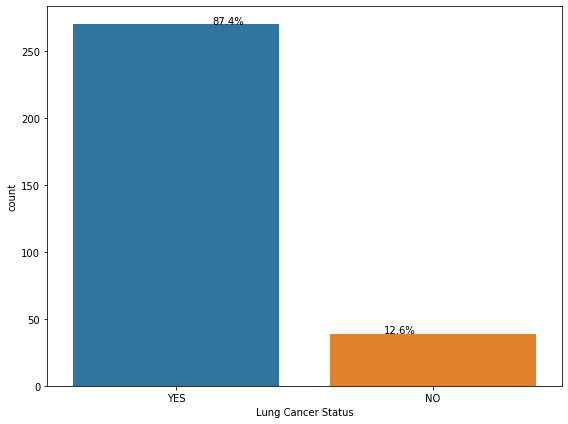

In [11]:
#plot the distribution of the target variable
plt.figure(figsize=(8,6))
total = float(len(df))
ax = sns.countplot(x='LUNG_CANCER', data=df)
# plt.title("Target variable Class Distribution")
plt.xlabel("Lung Cancer Status")
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = (p.get_x() + p.get_width())/1.5
    y = p.get_height()
    ax.annotate(percentage, (x, y),ha='right')
plt.tight_layout()

plt.savefig("class_distribution.jpeg")
plt.show()

It could be seen that the class distribution isn't uniform (the frequency of class "YES" is greatly greater than class "NO"). There are approximately seven times the record of patients with lung cancer than those without. Hence, we have an **imbalanced dataset**. This is going to be an issue for our machine learning model and so, it is going to be treated/handled later on using SMOTE algorithm.
<br>
<br>
<br>
Now, let's ssee the distribution for other variables/potential features

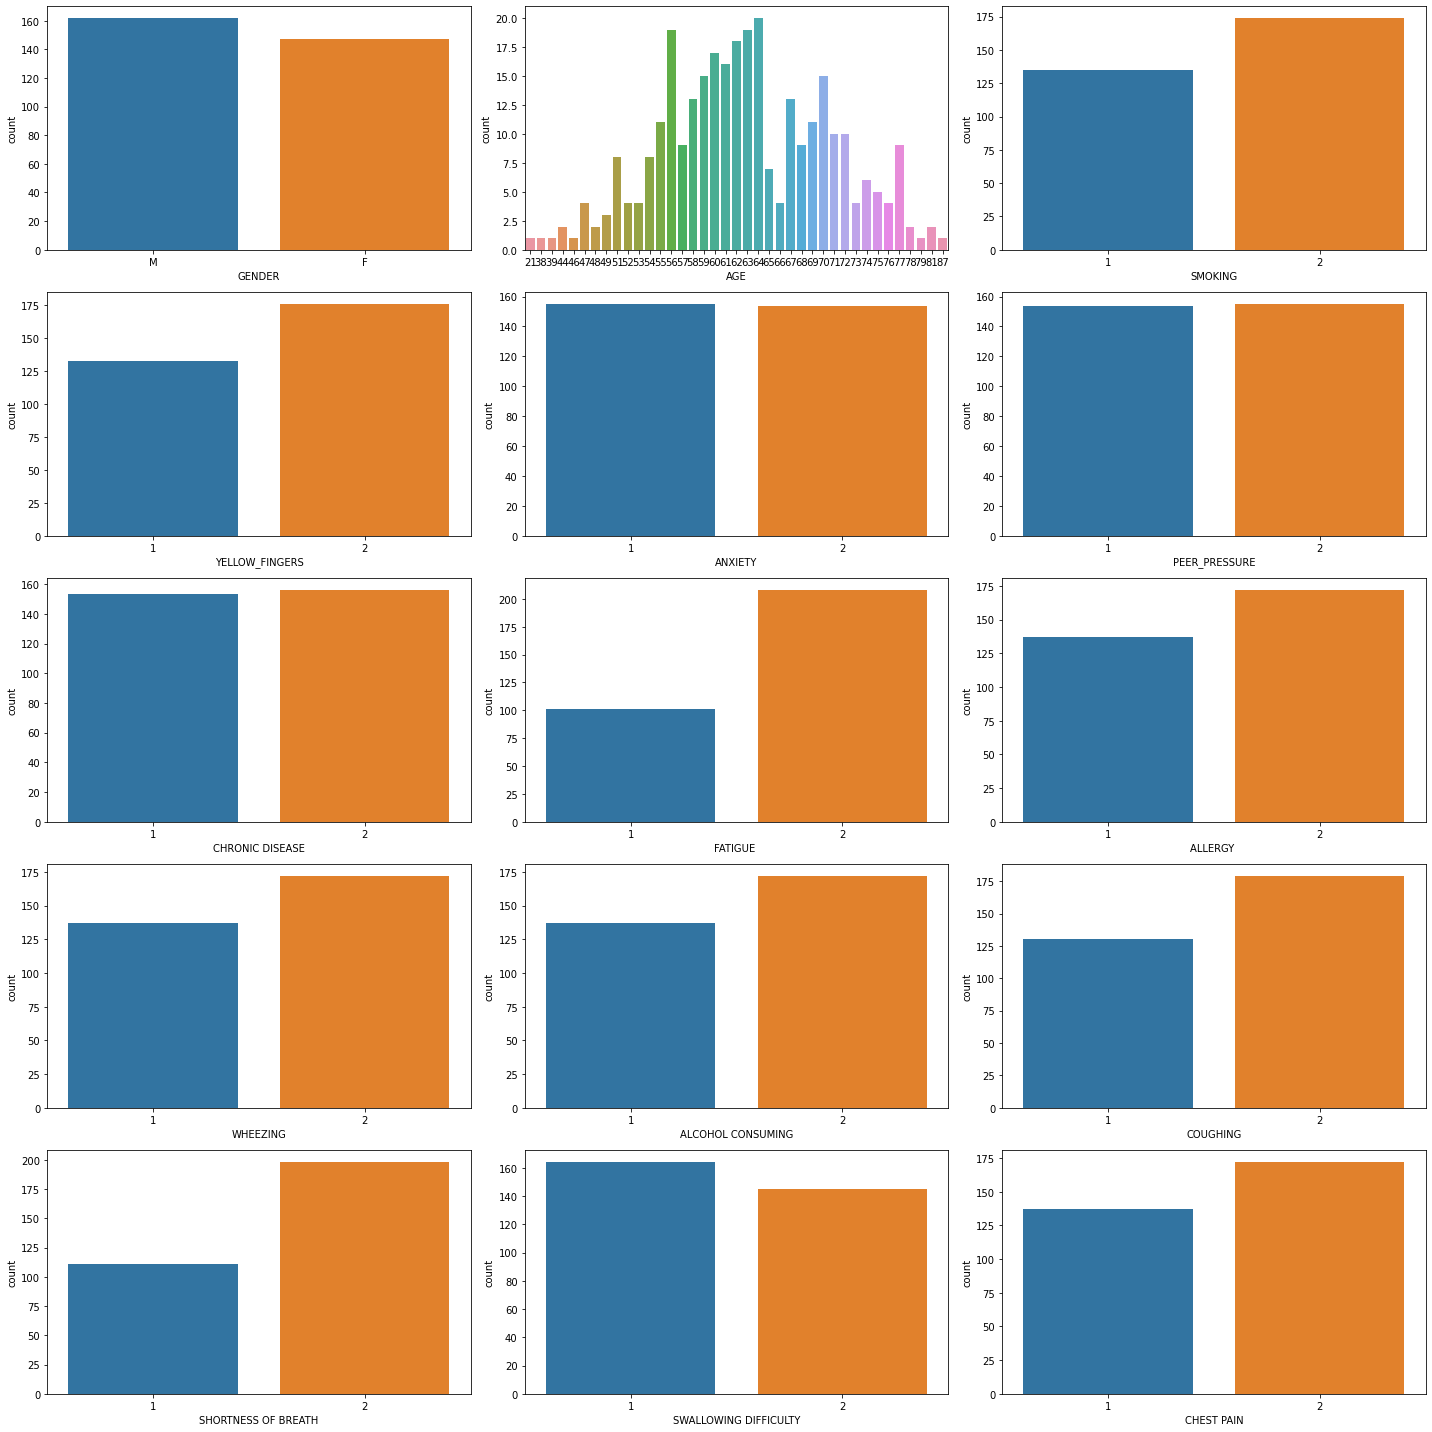

In [12]:
fig = plt.figure(figsize=(20,20))

for i, col in enumerate(df.drop(columns="LUNG_CANCER").columns.to_list()):
    ax1 = fig.add_subplot(5, 3, i+1)
    sns.countplot(x=col, data=df, ax=ax1)
plt.tight_layout()

fig.savefig('univariate_plots.jpeg')
plt.show()

The AGE variable which is the only quantitative variable has a guassian distribution which is of better advanatge to our model

## Bi-variate exploration

Plots and inferences would be made from the proportion/ratio of the target variable among the categories of all other variables:

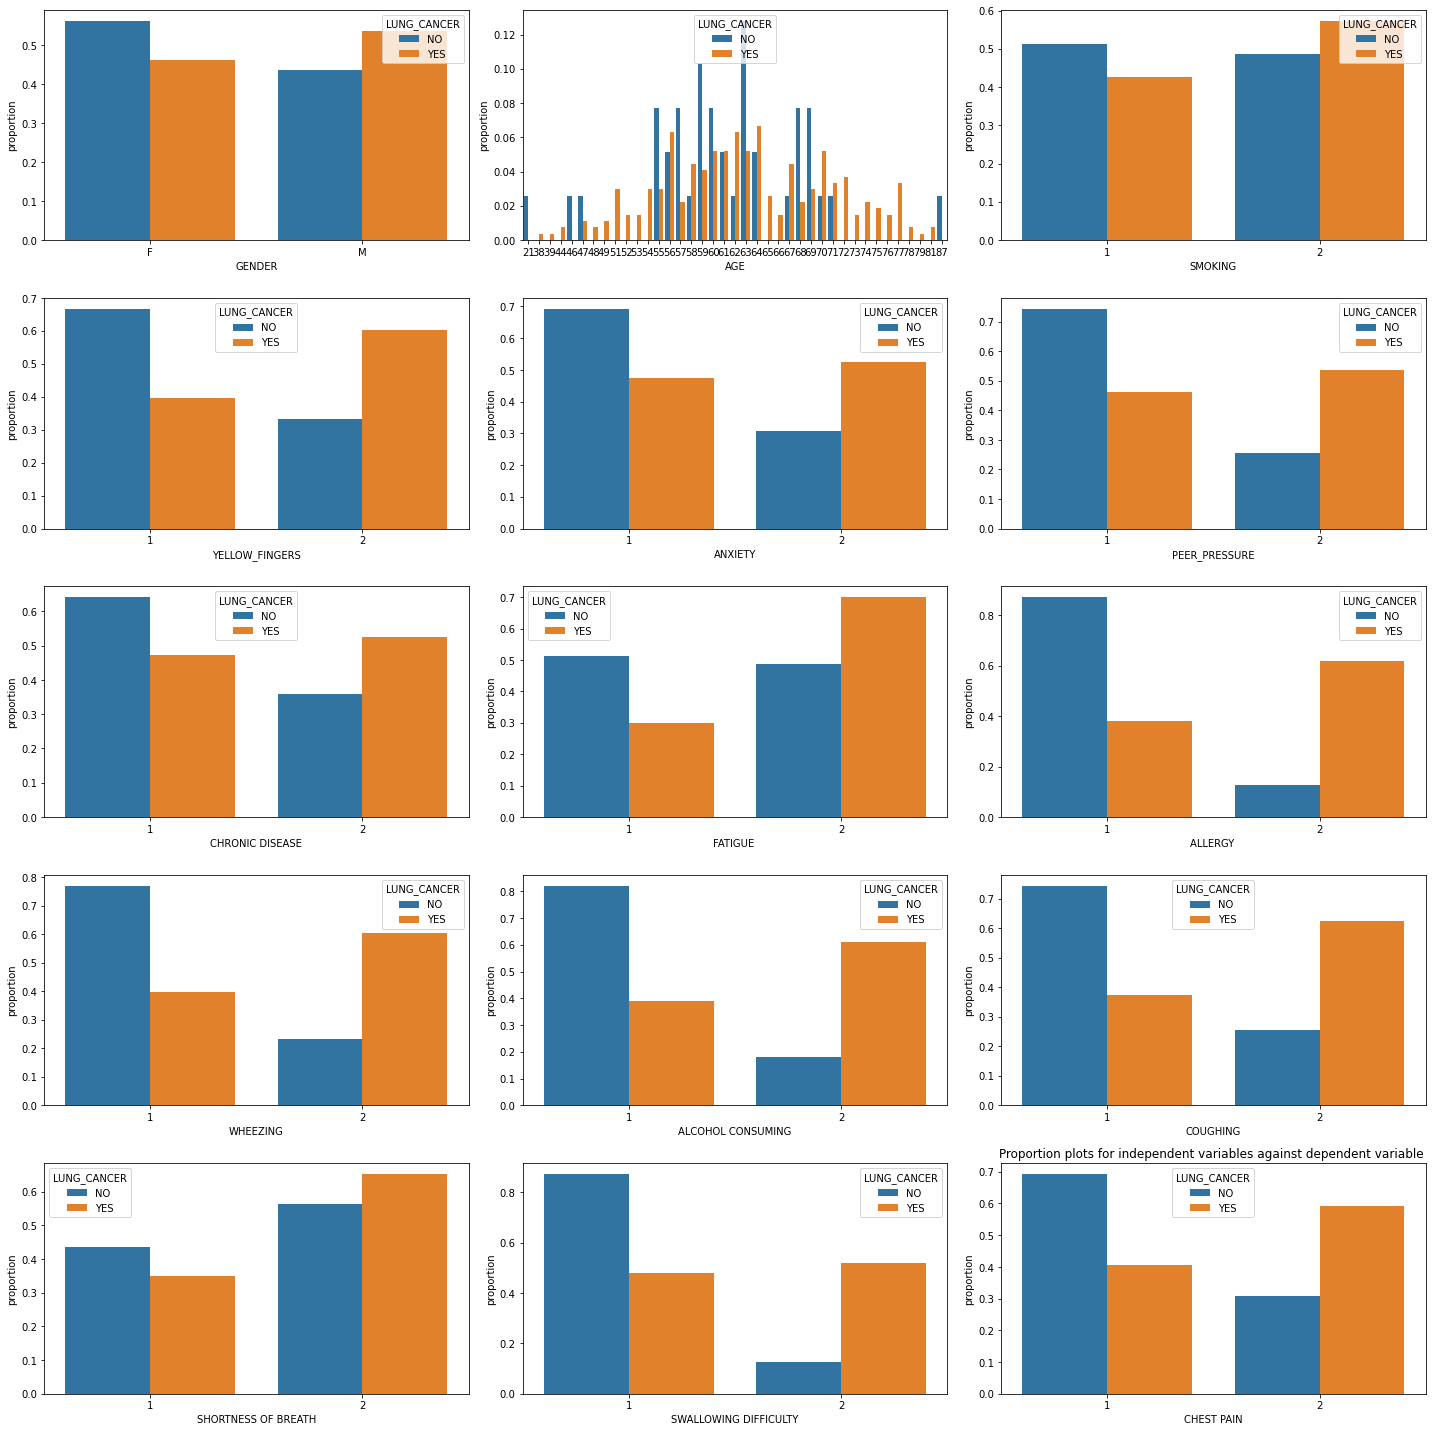

In [13]:
fig = plt.figure(figsize=(20,20))

for i, col in enumerate(df.drop(columns="LUNG_CANCER").columns.to_list()):
    ax1 = fig.add_subplot(5, 3, i+1)
    x, y, hue = col, "proportion", "LUNG_CANCER"
    (df[x]
     .groupby(df[hue])
     .value_counts(normalize=True)
     .rename(y)
     .reset_index()
     .pipe((sns.barplot, "data"), x=x, y=y, hue=hue, ax=ax1))
plt.title("Proportion plots for independent variables against dependent variable ")
plt.tight_layout()
fig.savefig('bivariate.jpeg')
plt.show()

All variables appeared to have variations in the distribution of the target variable among their categories e.g. proportion plot for `GENDER` against `LUNG_CANCER` above showed lung cancer to be more prevalent among Men than Women.
<br>
<br>
<br>
Now let’s test for multicollinearity using Pearson Correlation:

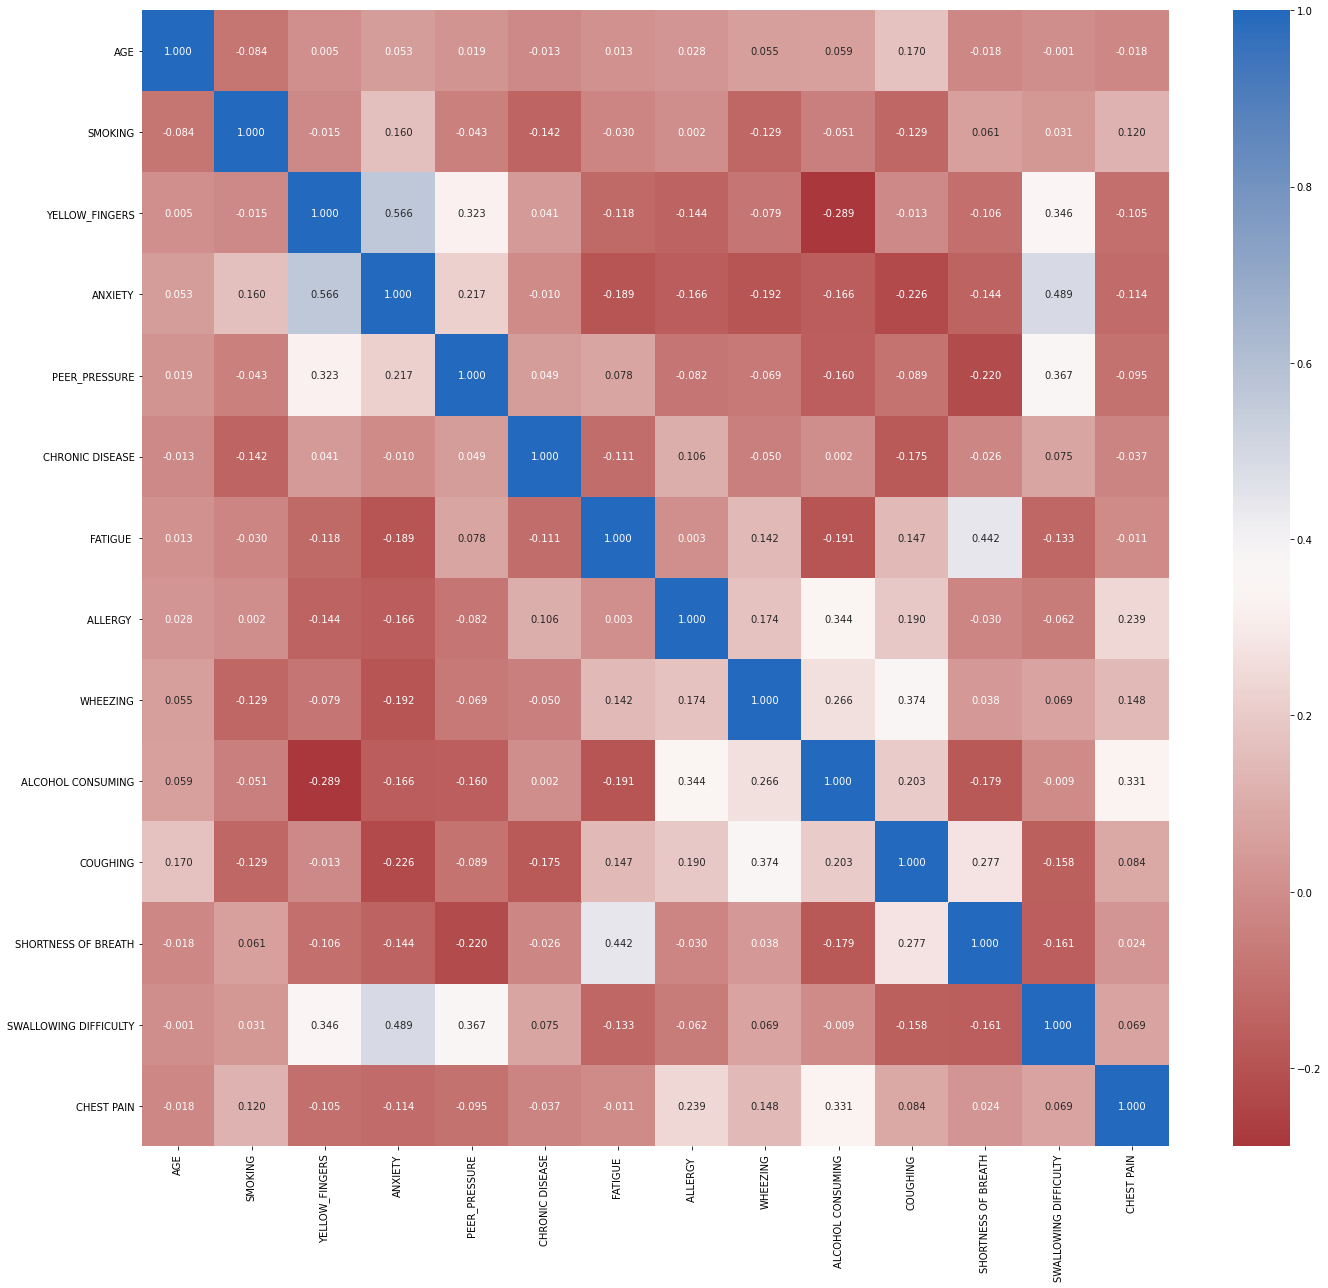

In [14]:
# correlation plot
plt.figure(figsize = [20, 18])
sns.heatmap(df.corr(), annot = True, fmt = '.3f',
           cmap = 'vlag_r')
plt.tight_layout()
plt.savefig('multi.jpeg') # save the plot
plt.show()

There are no multicollinearity

## NB: 
This round of exploration is not absolutely thorough; the point is to start off on the right foot
and quickly gain insights that will help us get a first reasonably good prototype. But this is an iterative
process: once we get a prototype up and running, we can analyze its output to gain more insights and
come back to this exploration step.

# 5. Data Preprocessing

In [15]:
# Let’s create a copy so we can play with it without harming the original dataset
clean_df = df.copy()

clean_df.head(n=4)

GENDER  AGE  SMOKING  YELLOW_FINGERS  ANXIETY  PEER_PRESSURE  \
0      M   69        1               2        2              1   
1      M   74        2               1        1              1   
2      F   59        1               1        1              2   
3      M   63        2               2        2              1   

   CHRONIC DISEASE  FATIGUE   ALLERGY   WHEEZING  ALCOHOL CONSUMING  COUGHING  \
0                1         2         1         2                  2         2   
1                2         2         2         1                  1         1   
2                1         2         1         2                  1         2   
3                1         1         1         1                  2         1   

   SHORTNESS OF BREATH  SWALLOWING DIFFICULTY  CHEST PAIN LUNG_CANCER  
0                    2                      2           2         YES  
1                    2                      2           2         YES  
2                    2                      1           2          NO  
3                    1                      2           2          NO

In [16]:
print("dataset:", clean_df.shape)

dataset: (309, 16)


### Drop Duplicated records

In [17]:
clean_df.drop_duplicates(inplace=True)

In [18]:
clean_df.duplicated().sum()

0

### Categorical Feature Encoding

In [19]:
# Encode labels in column 'GENDER'.
clean_df['GENDER'] = clean_df['GENDER'].map({'M': 1, 'F': 0})

# Encode labels in column 'LUNG_CANCER'.
clean_df['LUNG_CANCER'] = clean_df['LUNG_CANCER'].map({'YES': 1, 'NO': 0})

In [20]:
clean_df.head(n=4)

GENDER  AGE  SMOKING  YELLOW_FINGERS  ANXIETY  PEER_PRESSURE  \
0       1   69        1               2        2              1   
1       1   74        2               1        1              1   
2       0   59        1               1        1              2   
3       1   63        2               2        2              1   

   CHRONIC DISEASE  FATIGUE   ALLERGY   WHEEZING  ALCOHOL CONSUMING  COUGHING  \
0                1         2         1         2                  2         2   
1                2         2         2         1                  1         1   
2                1         2         1         2                  1         2   
3                1         1         1         1                  2         1   

   SHORTNESS OF BREATH  SWALLOWING DIFFICULTY  CHEST PAIN  LUNG_CANCER  
0                    2                      2           2            1  
1                    2                      2           2            1  
2                    2                      1           2            0  
3                    1                      2           2            0

In [21]:
print(clean_df['GENDER'].value_counts())
print("\n")
print(clean_df['LUNG_CANCER'].value_counts())

1    142
0    134
Name: GENDER, dtype: int64


1    238
0     38
Name: LUNG_CANCER, dtype: int64


### Data Partitioning


 This is necessary to have a set of data that will be used to evaluate our models to get the actual generalization score. 
To avoid a model that will be highly prone to overfitting: say we look at the test set, we may stumble upon some seemingly
interesting pattern in the test data that leads us to select a particular kind of Machine Learning mode and when we estimate the generalization score using the test set, our prediction will be too optimistic and we will launch a system that will not perform as well as expected. This is called data snooping bias.

Creating a test set is theoretically quite simple: just pick some instances randomly and ensured it is stratified (i.e equal ration of the target variable are assigned to the training and the test set). The test set is typically 20% of the
dataset which are set aside:

In [22]:
# first assign dependent and independent variables
feature_cols = clean_df.drop(columns=["LUNG_CANCER"]).columns
X = clean_df[feature_cols] # independent variables
y = clean_df["LUNG_CANCER"]   # dependent variables

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

In [24]:
# check for the distribution of the classes among the sets
print("General dataset:\n",clean_df["LUNG_CANCER"].value_counts())
print("\ntrain_set:\n",y_train.value_counts())
print("\ntest_set:\n",y_test.value_counts())

General dataset:
 1    238
0     38
Name: LUNG_CANCER, dtype: int64

train_set:
 1    190
0     30
Name: LUNG_CANCER, dtype: int64

test_set:
 1    48
0     8
Name: LUNG_CANCER, dtype: int64


In [25]:
X_train

GENDER  AGE  SMOKING  YELLOW_FINGERS  ANXIETY  PEER_PRESSURE  \
226       0   70        1               2        1              2   
181       0   74        2               2        2              2   
19        0   61        1               1        1              1   
178       0   61        2               2        2              2   
145       0   65        2               2        2              2   
..      ...  ...      ...             ...      ...            ...   
71        0   66        2               2        2              2   
23        1   60        2               1        1              1   
94        1   48        2               1        1              1   
42        0   77        1               2        2              2   
18        0   68        2               2        2              2   

     CHRONIC DISEASE  FATIGUE   ALLERGY   WHEEZING  ALCOHOL CONSUMING  \
226                2         2         2         1                  2   
181                1         2         1         2                  1   
19                 2         2         1         1                  1   
178                1         2         2         1                  1   
145                1         2         1         2                  1   
..               ...       ...       ...       ...                ...   
71                 1         2         1         2                  1   
23                 1         2         2         2                  2   
94                 2         2         2         1                  2   
42                 2         2         1         2                  2   
18                 2         2         1         1                  1   

     COUGHING  SHORTNESS OF BREATH  SWALLOWING DIFFICULTY  CHEST PAIN  
226         2                    1                      1           1  
181         2                    2                      2           1  
19          1                    2                      1           1  
178         1                    2                      2           2  
145         2                    2                      2           1  
..        ...                  ...                    ...         ...  
71          2                    2                      2           1  
23          2                    2                      1           2  
94          2                    2                      2           2  
42          1                    1                      1           1  
18          2                    2                      1           1  

[220 rows x 15 columns]

###  Feature scaling

In [26]:
# make a copy of X_train
X_train_scaled = X_train.copy()

# make a copy of X_test
X_test_scaled = X_test.copy()

In [27]:
scaler = StandardScaler()
scaler.fit(X_train_scaled)

StandardScaler()

In [28]:
X_train_scaled[X_train_scaled.columns] = scaler.transform(X_train)
X_train_scaled.head()

GENDER       AGE   SMOKING  YELLOW_FINGERS   ANXIETY  PEER_PRESSURE  \
226 -1.056118  0.831020 -1.126073        0.816497 -0.981981       1.037050   
181 -1.056118  1.333629  0.888042        0.816497  1.018350       1.037050   
19  -1.056118 -0.299852 -1.126073       -1.224745 -0.981981      -0.964274   
178 -1.056118 -0.299852  0.888042        0.816497  1.018350       1.037050   
145 -1.056118  0.202757  0.888042        0.816497  1.018350       1.037050   

     CHRONIC DISEASE  FATIGUE   ALLERGY   WHEEZING  ALCOHOL CONSUMING  \
226         0.946864  0.719195  0.929735 -1.065797           0.929735   
181        -1.056118  0.719195 -1.075576  0.938265          -1.075576   
19          0.946864  0.719195 -1.075576 -1.065797          -1.075576   
178        -1.056118  0.719195  0.929735 -1.065797          -1.075576   
145        -1.056118  0.719195 -1.075576  0.938265          -1.075576   

     COUGHING  SHORTNESS OF BREATH  SWALLOWING DIFFICULTY  CHEST PAIN  
226  0.839897            -1.390444              -0.938265   -1.147079  
181  0.839897             0.719195               1.065797   -1.147079  
19  -1.190623             0.719195              -0.938265   -1.147079  
178 -1.190623             0.719195               1.065797    0.871780  
145  0.839897             0.719195               1.065797   -1.147079

In [29]:
X_test_scaled[X_test_scaled.columns] = scaler.transform(X_test)
X_test_scaled.head()

GENDER       AGE   SMOKING  YELLOW_FINGERS   ANXIETY  PEER_PRESSURE  \
222 -1.056118  1.710587 -1.126073       -1.224745 -0.981981       1.037050   
25   0.946864  0.202757 -1.126073        0.816497  1.018350      -0.964274   
13   0.946864 -0.676810  0.888042       -1.224745 -0.981981      -0.964274   
107 -1.056118 -0.425505  0.888042        0.816497  1.018350       1.037050   
22  -1.056118 -5.325950  0.888042       -1.224745 -0.981981      -0.964274   

     CHRONIC DISEASE  FATIGUE   ALLERGY   WHEEZING  ALCOHOL CONSUMING  \
222         0.946864  0.719195  0.929735  0.938265           0.929735   
25         -1.056118  0.719195 -1.075576  0.938265           0.929735   
13         -1.056118  0.719195  0.929735  0.938265           0.929735   
107         0.946864 -1.390444  0.929735  0.938265           0.929735   
22          0.946864  0.719195  0.929735 -1.065797          -1.075576   

     COUGHING  SHORTNESS OF BREATH  SWALLOWING DIFFICULTY  CHEST PAIN  
222 -1.190623            -1.390444              -0.938265    0.871780  
25   0.839897             0.719195               1.065797    0.871780  
13   0.839897             0.719195              -0.938265    0.871780  
107 -1.190623            -1.390444               1.065797    0.871780  
22  -1.190623             0.719195              -0.938265   -1.147079

In [30]:
y_train.value_counts()

1    190
0     30
Name: LUNG_CANCER, dtype: int64

# Model Development

Metrics:

- Accuracy
- Precision
- Sensitivity/Recall
- Specificity
- Balanced Accuracy
- F1 score

To follow the best convention and ensure a cleaner notebook, I would make functions to perform some of the model development operations which I can apply to the different algorithms.

The functions are as below:

In [32]:
all_scores_dict = {} # scores for all models

In [33]:
def evaluate_model(actual_target, pred, data_type= "TEST"):
    """
    This function returns the evaluation metrics of a model on the test set
    
    params:
        actual_target: actual target for the test set
        pred: predicted target for the test 
    """
    
    

    class_report = metrics.classification_report(actual_target,pred, target_names=['NO', 'YES'])
    conf_mat = metrics.confusion_matrix(y_true=actual_target, y_pred=pred)
    
    acc_score = metrics.accuracy_score(actual_target,pred)
    prec = metrics.precision_score(actual_target,pred)
    sensitivity = metrics.recall_score(actual_target,pred)
    specificity = metrics.recall_score(actual_target,pred, pos_label=0)
    bal_acc = metrics.balanced_accuracy_score(actual_target, pred)
    f1_score = metrics.f1_score(actual_target,pred)
    
    
    print(f"\n=========================={data_type}=====================================")    
    print("confusion matrix: \n", conf_mat)
    print("\nAccuracy: %.3f"%(acc_score))
    print("Precision: %.3f"%(prec))
    print("Sensitivity/recall: %.3f"%(sensitivity))
    print("Specificity: %.3f"%(specificity))
    print("Balanced Accuracy: %.3f"%(bal_acc))
    print("F1 score: %.3f"%(f1_score))
    print("Classification report: \n",class_report)
    
    return [acc_score, prec, sensitivity, specificity, bal_acc, f1_score], conf_mat

def plot_confusion_matrix_heatmap(conf_mat, plot_name):
    """
    plots the confusion matrix
    
    params:
        conf_mat: confusion matrix
        plot_name: name to save the plot with 
    """
    fig, ax = plot_confusion_matrix(conf_mat=conf_mat,
                                    show_absolute=True,
                                    show_normed=True,
                                    colorbar=True)
    plt.yticks([0, 1], ['NO', 'YES'])
    plt.xticks([0, 1], ['NO', 'YES'])
    fig.savefig(plot_name+".jpeg")
    plt.show()

### Algorithm 1: Support Vector Machine Model (SVM)

In [34]:
svc_model = SVC(random_state = 42)
svc_model.fit(X_train_scaled, y_train)


# evaluate test set/Generalization scores and add to the score dataframe
svc_test_pred = svc_model.predict(X_test_scaled)
all_scores_dict['SVC'], svc_cm = evaluate_model(y_test, svc_test_pred, 'TEST')


==========================TEST=====================================
confusion matrix: 
 [[ 2  6]
 [ 2 46]]

Accuracy: 0.857
Precision: 0.885
Sensitivity/recall: 0.958
Specificity: 0.250
Balanced Accuracy: 0.604
F1 score: 0.920
Classification report: 
               precision    recall  f1-score   support

          NO       0.50      0.25      0.33         8
         YES       0.88      0.96      0.92        48

    accuracy                           0.86        56
   macro avg       0.69      0.60      0.63        56
weighted avg       0.83      0.86      0.84        56



Hyperparameter Tuning

In [34]:
# defining parameter range
param_grid_svc = {'kernel': ['rbf','linear','poly'], 'degree':[1,2, 3, 4], 'C': list(range(1,20,1)),'gamma':[0.01 , 0.1, 1, 10]}

print("Parameter Grid: ",param_grid_svc)

# Define the scoring metric
scorer = metrics.make_scorer(metrics.balanced_accuracy_score)

svc_grid = GridSearchCV(SVC(), param_grid_svc, refit = True, scoring=scorer, cv=3, verbose = 3, n_jobs=-1)
 
# fitting the model for grid search
svc_grid.fit(X_train_scaled, y_train)


# print best parameter after tuning
print("\n Best parameters: \n",svc_grid.best_params_)
 
# print how our model looks after hyper-parameter tuning
print("\n Best Estimators: \n",svc_grid.best_estimator_)

Parameter Grid:  {'kernel': ['rbf', 'linear', 'poly'], 'degree': [1, 2, 3, 4], 'C': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19], 'gamma': [0.01, 0.1, 1, 10]}
Fitting 3 folds for each of 912 candidates, totalling 2736 fits

 Best parameters: 
 {'C': 5, 'degree': 1, 'gamma': 0.1, 'kernel': 'poly'}

 Best Estimators: 
 SVC(C=5, degree=1, gamma=0.1, kernel='poly')


In [35]:
# try with the optimal parameter and evaluate on test set
opt_svc = SVC(random_state = 42, degree=1, C=5, gamma=0.1, kernel='poly')
opt_svc.fit(X_train_scaled, y_train)
test_pred = opt_svc.predict(X_test_scaled)
all_scores_dict['SVC_opt'], svc_opt_cm = evaluate_model(y_test, test_pred, 'TEST')


==========================TEST=====================================
confusion matrix: 
 [[ 7  1]
 [ 3 45]]

Accuracy: 0.929
Precision: 0.978
Sensitivity/recall: 0.938
Specificity: 0.875
Balanced Accuracy: 0.906
F1 score: 0.957
Classification report: 
               precision    recall  f1-score   support

          NO       0.70      0.88      0.78         8
         YES       0.98      0.94      0.96        48

    accuracy                           0.93        56
   macro avg       0.84      0.91      0.87        56
weighted avg       0.94      0.93      0.93        56



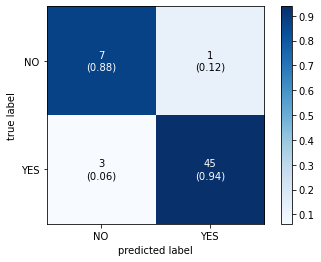

In [36]:
plot_confusion_matrix_heatmap(svc_opt_cm, "svc_opt_cm")

### Algorithm 2: Logistic Regression

In [37]:
lr_model = LogisticRegression(random_state = 42)
lr_model.fit(X_train_scaled, y_train)


# evaluate test set/Generalization scores
lr_test_pred = lr_model.predict(X_test_scaled)
all_scores_dict['LR'], lr_cm = evaluate_model(y_test, lr_test_pred, 'TEST')


==========================TEST=====================================
confusion matrix: 
 [[ 4  4]
 [ 2 46]]

Accuracy: 0.893
Precision: 0.920
Sensitivity/recall: 0.958
Specificity: 0.500
Balanced Accuracy: 0.729
F1 score: 0.939
Classification report: 
               precision    recall  f1-score   support

          NO       0.67      0.50      0.57         8
         YES       0.92      0.96      0.94        48

    accuracy                           0.89        56
   macro avg       0.79      0.73      0.76        56
weighted avg       0.88      0.89      0.89        56



In [40]:
# defining parameter range
lr_param_grid = {'penalty' : ['l1', 'l2'], 
                 'C' : np.logspace(-4, 7), 
                 'solver' : ['lbfgs', 'liblinear']}

print("Parameter Grid: ",lr_param_grid)

lr_grid = GridSearchCV(LogisticRegression(random_state = 42), lr_param_grid, refit = True, scoring='accuracy', cv=3, 
                       verbose = 3, n_jobs=-1)
 
# fitting the model for grid search
lr_grid.fit(X_train_scaled, y_train)


# print best parameter after tuning
print("\n Best parameters: \n",lr_grid.best_params_)
 
# print how our model looks after hyper-parameter tuning
print("\n Best Estimators: \n",lr_grid.best_estimator_)

Parameter Grid:  {'penalty': ['l1', 'l2'], 'C': array([1.00000000e-04, 1.67683294e-04, 2.81176870e-04, 4.71486636e-04,
       7.90604321e-04, 1.32571137e-03, 2.22299648e-03, 3.72759372e-03,
       6.25055193e-03, 1.04811313e-02, 1.75751062e-02, 2.94705170e-02,
       4.94171336e-02, 8.28642773e-02, 1.38949549e-01, 2.32995181e-01,
       3.90693994e-01, 6.55128557e-01, 1.09854114e+00, 1.84206997e+00,
       3.08884360e+00, 5.17947468e+00, 8.68511374e+00, 1.45634848e+01,
       2.44205309e+01, 4.09491506e+01, 6.86648845e+01, 1.15139540e+02,
       1.93069773e+02, 3.23745754e+02, 5.42867544e+02, 9.10298178e+02,
       1.52641797e+03, 2.55954792e+03, 4.29193426e+03, 7.19685673e+03,
       1.20679264e+04, 2.02358965e+04, 3.39322177e+04, 5.68986603e+04,
       9.54095476e+04, 1.59985872e+05, 2.68269580e+05, 4.49843267e+05,
       7.54312006e+05, 1.26485522e+06, 2.12095089e+06, 3.55648031e+06,
       5.96362332e+06, 1.00000000e+07]), 'solver': ['lbfgs', 'liblinear']}
Fitting 3 folds for each 

In [38]:
# try with the optimal parameter and evaluate on test set
opt_lr = LogisticRegression(random_state = 42, C=1.0985411419875573, solver='liblinear', penalty='l2')

opt_lr.fit(X_train_scaled, y_train)
lr_test_pred = opt_lr.predict(X_test_scaled)
all_scores_dict['LR_opt'], lr_opt_cm = evaluate_model(y_test, lr_test_pred, 'TEST')


==========================TEST=====================================
confusion matrix: 
 [[ 5  3]
 [ 2 46]]

Accuracy: 0.911
Precision: 0.939
Sensitivity/recall: 0.958
Specificity: 0.625
Balanced Accuracy: 0.792
F1 score: 0.948
Classification report: 
               precision    recall  f1-score   support

          NO       0.71      0.62      0.67         8
         YES       0.94      0.96      0.95        48

    accuracy                           0.91        56
   macro avg       0.83      0.79      0.81        56
weighted avg       0.91      0.91      0.91        56



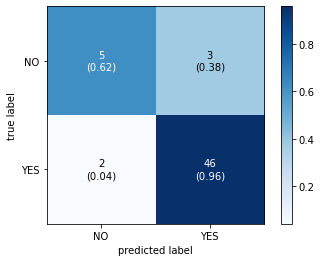

In [39]:
plot_confusion_matrix_heatmap(lr_opt_cm, "lr_opt_cm")

### Algorithm 3: K-Neighbors (KNeighborsClassifier)

In [40]:
kn_model = KNeighborsClassifier()
kn_model.fit(X_train_scaled, y_train)


# evaluate test set/Generalization scores
kn_test_pred = kn_model.predict(X_test_scaled)
all_scores_dict['KNN'], knn_cm = evaluate_model(y_test, kn_test_pred, 'TEST')


==========================TEST=====================================
confusion matrix: 
 [[ 3  5]
 [ 1 47]]

Accuracy: 0.893
Precision: 0.904
Sensitivity/recall: 0.979
Specificity: 0.375
Balanced Accuracy: 0.677
F1 score: 0.940
Classification report: 
               precision    recall  f1-score   support

          NO       0.75      0.38      0.50         8
         YES       0.90      0.98      0.94        48

    accuracy                           0.89        56
   macro avg       0.83      0.68      0.72        56
weighted avg       0.88      0.89      0.88        56



In [52]:
# defining parameter range
kn_param_grid = {'n_neighbors' : list(range(2,8,1)), 
                 'p' : [1, 2], # p=1 - Manhattan Distance p=2 - Euclidean Distance
                 'weights' : ['uniform', 'distance']           
                 }

print("Parameter Grid: ",kn_param_grid)
# Define the scoring metric
scorer = metrics.make_scorer(metrics.balanced_accuracy_score)
kn_grid = GridSearchCV(KNeighborsClassifier(), kn_param_grid, scoring=scorer, refit = True, cv=5, verbose = 3, n_jobs=-1)
 
# fitting the model for grid search
kn_grid.fit(X_train_scaled, y_train)


# print best parameter after tuning
print("\n Best parameters: \n",kn_grid.best_params_)
 
# print how our model looks after hyper-parameter tuning
print("\n Best Estimators: \n",kn_grid.best_estimator_)

Parameter Grid:  {'n_neighbors': [2, 3, 4, 5, 6, 7], 'p': [1, 2], 'weights': ['uniform', 'distance']}
Fitting 5 folds for each of 24 candidates, totalling 120 fits

 Best parameters: 
 {'n_neighbors': 2, 'p': 1, 'weights': 'uniform'}

 Best Estimators: 
 KNeighborsClassifier(n_neighbors=2, p=1)


In [41]:
# try with the optimal parameter and evaluate on test set
opt_kn = KNeighborsClassifier(n_neighbors=2, p=1, weights='uniform')
opt_kn.fit(X_train_scaled, y_train)
kn_test_pred = opt_kn.predict(X_test_scaled)
all_scores_dict['KNN_opt'], knn_opt_cm = evaluate_model(y_test, kn_test_pred, 'TEST')


==========================TEST=====================================
confusion matrix: 
 [[ 8  0]
 [ 4 44]]

Accuracy: 0.929
Precision: 1.000
Sensitivity/recall: 0.917
Specificity: 1.000
Balanced Accuracy: 0.958
F1 score: 0.957
Classification report: 
               precision    recall  f1-score   support

          NO       0.67      1.00      0.80         8
         YES       1.00      0.92      0.96        48

    accuracy                           0.93        56
   macro avg       0.83      0.96      0.88        56
weighted avg       0.95      0.93      0.93        56



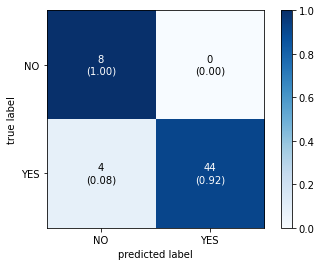

In [42]:
plot_confusion_matrix_heatmap(knn_opt_cm, "knn_opt_cm")

### Algorithm 4: Random Forest (RandomForestClassifier)

In [43]:
rf_model = RandomForestClassifier(random_state = 42)
rf_model.fit(X_train_scaled, y_train)


# evaluate test set/Generalization scores
rf_test_pred = rf_model.predict(X_test_scaled)
all_scores_dict['RF'], rf_cm = evaluate_model(y_test, rf_test_pred, 'TEST')


==========================TEST=====================================
confusion matrix: 
 [[ 6  2]
 [ 2 46]]

Accuracy: 0.929
Precision: 0.958
Sensitivity/recall: 0.958
Specificity: 0.750
Balanced Accuracy: 0.854
F1 score: 0.958
Classification report: 
               precision    recall  f1-score   support

          NO       0.75      0.75      0.75         8
         YES       0.96      0.96      0.96        48

    accuracy                           0.93        56
   macro avg       0.85      0.85      0.85        56
weighted avg       0.93      0.93      0.93        56



In [45]:
# defining parameter range
rf_param_grid = {
    'n_estimators': list(range(100,250,10)),
    'min_samples_split': [2, 3, 4, 5, 10],
    'min_samples_leaf': [1, 2, 3, 4],
    'max_features': list(range(2,8,1)),
    'criterion':["gini", "entropy"]
}

print("Parameter Grid: ",rf_param_grid)

rf_grid = GridSearchCV(RandomForestClassifier(random_state = 42), rf_param_grid, refit = True,
                       scoring="accuracy", cv=3, verbose = 3, n_jobs=-1)
 
# fitting the model for grid search
rf_grid.fit(X_train_scaled, y_train)


# print best parameter after tuning
print("\n Best parameters: \n",rf_grid.best_params_)
 
# print how our model looks after hyper-parameter tuning
print("\n Best Estimators: \n",rf_grid.best_estimator_)

Parameter Grid:  {'n_estimators': [100, 110, 120, 130, 140, 150, 160, 170, 180, 190, 200, 210, 220, 230, 240], 'min_samples_split': [2, 3, 4, 5, 10], 'min_samples_leaf': [1, 2, 3, 4], 'max_features': [2, 3, 4, 5, 6, 7], 'criterion': ['gini', 'entropy']}
Fitting 3 folds for each of 3600 candidates, totalling 10800 fits

 Best parameters: 
 {'criterion': 'gini', 'max_features': 2, 'min_samples_leaf': 1, 'min_samples_split': 4, 'n_estimators': 100}

 Best Estimators: 
 RandomForestClassifier(max_features=2, min_samples_split=4, random_state=42)


In [59]:
# try with the optimal parameter and evaluate on test set
opt_rf = RandomForestClassifier(max_features=8, min_samples_split=1, n_estimators=100, random_state=42)
opt_rf.fit(X_train_scaled, y_train)
rf_test_pred = opt_rf.predict(X_test_scaled)
all_scores_dict['RF_opt'], rf_opt_cm = evaluate_model(y_test, rf_test_pred, 'TEST')


==========================TEST=====================================
confusion matrix: 
 [[ 7  1]
 [ 3 45]]

Accuracy: 0.929
Precision: 0.978
Sensitivity/recall: 0.938
Specificity: 0.875
Balanced Accuracy: 0.906
F1 score: 0.957
Classification report: 
               precision    recall  f1-score   support

          NO       0.70      0.88      0.78         8
         YES       0.98      0.94      0.96        48

    accuracy                           0.93        56
   macro avg       0.84      0.91      0.87        56
weighted avg       0.94      0.93      0.93        56



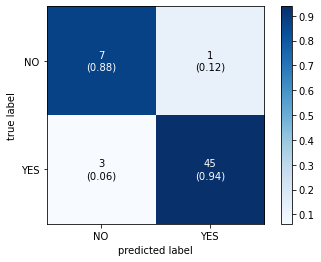

In [60]:
plot_confusion_matrix_heatmap(rf_opt_cm, "rf_opt_cm")

### Algorithm 5: Gradient Boosting Model (GradientBoostClassifier)

In [61]:
gb_model = GradientBoostingClassifier(random_state=42)
gb_model.fit(X_train_scaled, y_train)


# evaluate test set/Generalization scores
gb_test_pred = gb_model.predict(X_test_scaled)
all_scores_dict['GBoosting'], gb_cm = evaluate_model(y_test, gb_test_pred, 'TEST')


==========================TEST=====================================
confusion matrix: 
 [[ 4  4]
 [ 3 45]]

Accuracy: 0.875
Precision: 0.918
Sensitivity/recall: 0.938
Specificity: 0.500
Balanced Accuracy: 0.719
F1 score: 0.928
Classification report: 
               precision    recall  f1-score   support

          NO       0.57      0.50      0.53         8
         YES       0.92      0.94      0.93        48

    accuracy                           0.88        56
   macro avg       0.74      0.72      0.73        56
weighted avg       0.87      0.88      0.87        56



Gradient Boosting hyperparameter tuning using GridSearchCV (Note: all hyperparameter tuning cells takes a very long time, so DO NOT RERUN)

In [67]:
gb_param_grid = {'max_depth':range(1,16,1),
                 'min_samples_split':range(2,50,2),
                 'max_features':range(7,20,2),
                 'min_samples_leaf':range(2,50,2),
                 'subsample':[0.5,0.6,0.7,0.75,0.8,0.85,0.9],
                }

print("Parameter Grid: ",gb_param_grid)

gb_grid = GridSearchCV(estimator = GradientBoostingClassifier(random_state=42, learning_rate=0.05),
                        param_grid = gb_param_grid, scoring='accuracy',n_jobs=4, cv=3, verbose = 3)
 
# fitting the model for grid search
gb_grid.fit(X_train_scaled, y_train)

# print best parameter after tuning
print("\n Best parameters: \n",gb_grid.best_params_)
 
# print how our model looks after hyper-parameter tuning
print("\n Best Estimators: \n",gb_grid.best_estimator_)

In [77]:
# try with the optimal parameter and evaluate on test set
gb_best_params = {'learning_rate':0.01, 'n_estimators':200,'max_depth':6,
                  'min_samples_split':1, 'min_samples_leaf':1, 'subsample':0.8,
                  'max_features':6}

opt_gb = GradientBoostingClassifier(**gb_best_params, random_state=42)
opt_gb.fit(X_train_scaled, y_train)
gb_test_pred = opt_gb.predict(X_test_scaled)
all_scores_dict['GB_opt'], gb_opt_cm = evaluate_model(y_test, gb_test_pred, 'TEST')


==========================TEST=====================================
confusion matrix: 
 [[ 5  3]
 [ 2 46]]

Accuracy: 0.911
Precision: 0.939
Sensitivity/recall: 0.958
Specificity: 0.625
Balanced Accuracy: 0.792
F1 score: 0.948
Classification report: 
               precision    recall  f1-score   support

          NO       0.71      0.62      0.67         8
         YES       0.94      0.96      0.95        48

    accuracy                           0.91        56
   macro avg       0.83      0.79      0.81        56
weighted avg       0.91      0.91      0.91        56



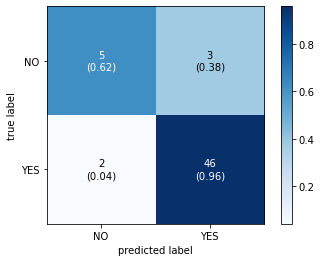

In [78]:
plot_confusion_matrix_heatmap(gb_opt_cm, "gb_opt_cm")

### Algorithm 6: Naive Bayes

In [79]:
from sklearn.naive_bayes import GaussianNB

gnb_model = GaussianNB()
gnb_model.fit(X_train_scaled, y_train)

gnb_test_pred = gnb_model.predict(X_test_scaled)
all_scores_dict['NB'], nb_cm = evaluate_model(y_test, gnb_test_pred, 'TEST')


==========================TEST=====================================
confusion matrix: 
 [[ 4  4]
 [ 2 46]]

Accuracy: 0.893
Precision: 0.920
Sensitivity/recall: 0.958
Specificity: 0.500
Balanced Accuracy: 0.729
F1 score: 0.939
Classification report: 
               precision    recall  f1-score   support

          NO       0.67      0.50      0.57         8
         YES       0.92      0.96      0.94        48

    accuracy                           0.89        56
   macro avg       0.79      0.73      0.76        56
weighted avg       0.88      0.89      0.89        56



In [80]:
nb_param_grid = {'var_smoothing': np.logspace(0,-9, num=100)}

print("Parameter Grid: ",nb_param_grid)

nb_grid = GridSearchCV(estimator = GaussianNB(),
                        param_grid = nb_param_grid, scoring='accuracy',n_jobs=-1, cv=3, verbose = 3)
 
# fitting the model for grid search
nb_grid.fit(X_train_scaled, y_train)


# print best parameter after tuning
print("\n Best parameters: \n",nb_grid.best_params_)
 
# print how our model looks after hyper-parameter tuning
print("\n Best Estimators: \n",nb_grid.best_estimator_)

Parameter Grid:  {'var_smoothing': array([1.00000000e+00, 8.11130831e-01, 6.57933225e-01, 5.33669923e-01,
       4.32876128e-01, 3.51119173e-01, 2.84803587e-01, 2.31012970e-01,
       1.87381742e-01, 1.51991108e-01, 1.23284674e-01, 1.00000000e-01,
       8.11130831e-02, 6.57933225e-02, 5.33669923e-02, 4.32876128e-02,
       3.51119173e-02, 2.84803587e-02, 2.31012970e-02, 1.87381742e-02,
       1.51991108e-02, 1.23284674e-02, 1.00000000e-02, 8.11130831e-03,
       6.57933225e-03, 5.33669923e-03, 4.32876128e-03, 3.51119173e-03,
       2.84803587e-03, 2.31012970e-03, 1.87381742e-03, 1.51991108e-03,
       1.23284674e-03, 1.00000000e-03, 8.11130831e-04, 6.57933225e-04,
       5.33669923e-04, 4.32876128e-04, 3.51119173e-04, 2.84803587e-04,
       2.31012970e-04, 1.87381742e-04, 1.51991108e-04, 1.23284674e-04,
       1.00000000e-04, 8.11130831e-05, 6.57933225e-05, 5.33669923e-05,
       4.32876128e-05, 3.51119173e-05, 2.84803587e-05, 2.31012970e-05,
       1.87381742e-05, 1.51991108e-05, 1.2

In [81]:
# try with the optimal parameter and evaluate on test set
opt_nb = GaussianNB(var_smoothing=0.533669923120631)
opt_nb.fit(X_train_scaled, y_train)

nb_test_pred = opt_nb.predict(X_test_scaled)
all_scores_dict['NB_opt'], nb_opt_cm = evaluate_model(y_test, nb_test_pred, 'TEST')


==========================TEST=====================================
confusion matrix: 
 [[ 4  4]
 [ 1 47]]

Accuracy: 0.911
Precision: 0.922
Sensitivity/recall: 0.979
Specificity: 0.500
Balanced Accuracy: 0.740
F1 score: 0.949
Classification report: 
               precision    recall  f1-score   support

          NO       0.80      0.50      0.62         8
         YES       0.92      0.98      0.95        48

    accuracy                           0.91        56
   macro avg       0.86      0.74      0.78        56
weighted avg       0.90      0.91      0.90        56



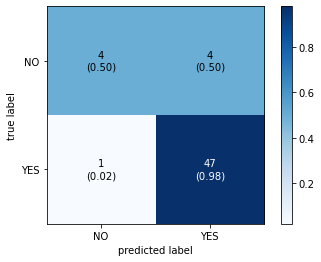

In [82]:
plot_confusion_matrix_heatmap(nb_opt_cm, "nb_opt_cm")

### Algorithm 7: Linear Discriminant Analysis

In [83]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
lda_model = LinearDiscriminantAnalysis()
lda_model.fit(X_train_scaled, y_train)

lda_test_pred = lda_model.predict(X_test_scaled)
all_scores_dict['LDA'], lda_cm = evaluate_model(y_test, lda_test_pred, 'TEST')


==========================TEST=====================================
confusion matrix: 
 [[ 5  3]
 [ 1 47]]

Accuracy: 0.929
Precision: 0.940
Sensitivity/recall: 0.979
Specificity: 0.625
Balanced Accuracy: 0.802
F1 score: 0.959
Classification report: 
               precision    recall  f1-score   support

          NO       0.83      0.62      0.71         8
         YES       0.94      0.98      0.96        48

    accuracy                           0.93        56
   macro avg       0.89      0.80      0.84        56
weighted avg       0.92      0.93      0.92        56



In [85]:
lda_param_grid = {'solver':['svd', 'lsqr', 'eigen'],
                  'shrinkage': np.arange(0, 1, 0.01)}

print("Parameter Grid: ",lda_param_grid)

lda_grid = GridSearchCV(estimator = LinearDiscriminantAnalysis(),
                        param_grid = lda_param_grid, scoring='accuracy',n_jobs=-1, cv=10, verbose = 3)
 
# fitting the model for grid search
lda_grid.fit(X_train_scaled, y_train)



# print best parameter after tuning
print("\n Best parameters: \n",lda_grid.best_params_)
 
# print how our model looks after hyper-parameter tuning
print("\n Best Estimators: \n",lda_grid.best_estimator_)

Parameter Grid:  {'solver': ['svd', 'lsqr', 'eigen'], 'shrinkage': array([0.  , 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 ,
       0.11, 0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 , 0.21,
       0.22, 0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3 , 0.31, 0.32,
       0.33, 0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4 , 0.41, 0.42, 0.43,
       0.44, 0.45, 0.46, 0.47, 0.48, 0.49, 0.5 , 0.51, 0.52, 0.53, 0.54,
       0.55, 0.56, 0.57, 0.58, 0.59, 0.6 , 0.61, 0.62, 0.63, 0.64, 0.65,
       0.66, 0.67, 0.68, 0.69, 0.7 , 0.71, 0.72, 0.73, 0.74, 0.75, 0.76,
       0.77, 0.78, 0.79, 0.8 , 0.81, 0.82, 0.83, 0.84, 0.85, 0.86, 0.87,
       0.88, 0.89, 0.9 , 0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97, 0.98,
       0.99])}
Fitting 10 folds for each of 300 candidates, totalling 3000 fits

 Best parameters: 
 {'shrinkage': 0.2, 'solver': 'lsqr'}

 Best Estimators: 
 LinearDiscriminantAnalysis(shrinkage=0.2, solver='lsqr')


In [96]:
# try with the optimal parameter and evaluate on test set
opt_lda = LinearDiscriminantAnalysis(shrinkage=0.6, solver='lsqr')
opt_lda.fit(X_train_scaled, y_train)
lda_test_pred = opt_lda.predict(X_test_scaled)
all_scores_dict['LDA_opt'], lda_opt_cm = evaluate_model(y_test, lda_test_pred, 'TEST')


==========================TEST=====================================
confusion matrix: 
 [[ 5  3]
 [ 1 47]]

Accuracy: 0.929
Precision: 0.940
Sensitivity/recall: 0.979
Specificity: 0.625
Balanced Accuracy: 0.802
F1 score: 0.959
Classification report: 
               precision    recall  f1-score   support

          NO       0.83      0.62      0.71         8
         YES       0.94      0.98      0.96        48

    accuracy                           0.93        56
   macro avg       0.89      0.80      0.84        56
weighted avg       0.92      0.93      0.92        56



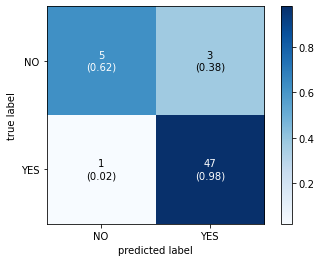

In [97]:
plot_confusion_matrix_heatmap(lda_opt_cm, "lda_opt_cm")

### Algorithm 8: Decision Tree

In [98]:
from sklearn.tree import DecisionTreeClassifier
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train_scaled, y_train)

dt_test_pred = dt_model.predict(X_test_scaled)
all_scores_dict['DT'], dt_cm = evaluate_model(y_test, dt_test_pred, 'TEST')


==========================TEST=====================================
confusion matrix: 
 [[ 7  1]
 [ 4 44]]

Accuracy: 0.911
Precision: 0.978
Sensitivity/recall: 0.917
Specificity: 0.875
Balanced Accuracy: 0.896
F1 score: 0.946
Classification report: 
               precision    recall  f1-score   support

          NO       0.64      0.88      0.74         8
         YES       0.98      0.92      0.95        48

    accuracy                           0.91        56
   macro avg       0.81      0.90      0.84        56
weighted avg       0.93      0.91      0.92        56



In [101]:
 # Create the parameter grid based on the results of random search 
dt_param_grid = {'max_depth': [None,1, 2, 3, 5, 10, 20],
                 'min_samples_leaf': [1, 2, 4, 5, 10, 20, 50],
                 'criterion': ["gini", "entropy"],
                 'min_samples_split': [1,2, 5, 6, 8, 10],
                 'max_features': ['auto', 'sqrt', 'log2']
                }

print("Parameter Grid: ",dt_param_grid)

dt_grid = GridSearchCV(estimator = DecisionTreeClassifier(random_state=42),
                        param_grid = dt_param_grid, scoring='accuracy',n_jobs=-1, cv=3, verbose = 3)
 
# fitting the model for grid search
dt_grid.fit(X_train_scaled, y_train)



# print best parameter after tuning
print("\n Best parameters: \n",dt_grid.best_params_)
 
# print how our model looks after hyper-parameter tuning
print("\n Best Estimators: \n",dt_grid.best_estimator_)

Parameter Grid:  {'max_depth': [None, 1, 2, 3, 5, 10, 20], 'min_samples_leaf': [1, 2, 4, 5, 10, 20, 50], 'criterion': ['gini', 'entropy'], 'min_samples_split': [1, 2, 5, 6, 8, 10], 'max_features': ['auto', 'sqrt', 'log2']}
Fitting 3 folds for each of 1764 candidates, totalling 5292 fits

 Best parameters: 
 {'criterion': 'gini', 'max_depth': None, 'max_features': 'auto', 'min_samples_leaf': 20, 'min_samples_split': 1}

 Best Estimators: 
 DecisionTreeClassifier(max_features='auto', min_samples_leaf=20,
                       min_samples_split=1, random_state=42)


In [103]:
# try with the optimal parameter and evaluate on test set
opt_dt = DecisionTreeClassifier(random_state=42) # best params returned performed less than the default params

opt_dt.fit(X_train_scaled, y_train)
dt_test_pred = opt_dt.predict(X_test_scaled)
all_scores_dict['DT_opt'], dt_opt_cm = evaluate_model(y_test, dt_test_pred, 'TEST')


==========================TEST=====================================
confusion matrix: 
 [[ 7  1]
 [ 4 44]]

Accuracy: 0.911
Precision: 0.978
Sensitivity/recall: 0.917
Specificity: 0.875
Balanced Accuracy: 0.896
F1 score: 0.946
Classification report: 
               precision    recall  f1-score   support

          NO       0.64      0.88      0.74         8
         YES       0.98      0.92      0.95        48

    accuracy                           0.91        56
   macro avg       0.81      0.90      0.84        56
weighted avg       0.93      0.91      0.92        56



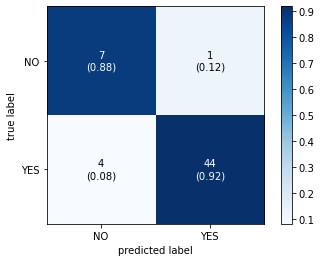

In [104]:
plot_confusion_matrix_heatmap(dt_opt_cm, "dt_opt_cm")

### Algorithm 9: Bagging

In [105]:
from sklearn.ensemble import BaggingClassifier

# Create bagging classifier
bc_model = BaggingClassifier(n_estimators=6,random_state = 22)
# Fit the model
bc_model.fit(X_train_scaled, y_train)

bc_test_pred = bc_model.predict(X_test_scaled)
all_scores_dict['Bagging'], bagging_cm = evaluate_model(y_test, bc_test_pred, 'TEST')


==========================TEST=====================================
confusion matrix: 
 [[ 7  1]
 [ 3 45]]

Accuracy: 0.929
Precision: 0.978
Sensitivity/recall: 0.938
Specificity: 0.875
Balanced Accuracy: 0.906
F1 score: 0.957
Classification report: 
               precision    recall  f1-score   support

          NO       0.70      0.88      0.78         8
         YES       0.98      0.94      0.96        48

    accuracy                           0.93        56
   macro avg       0.84      0.91      0.87        56
weighted avg       0.94      0.93      0.93        56



In [107]:
 # Create the parameter grid based on the results of random search 
bc_param_grid = {'n_estimators':range(1,50,2)}

print("Parameter Grid: ",bc_param_grid)

bc_grid = GridSearchCV(estimator = BaggingClassifier(random_state = 42),
                        param_grid = bc_param_grid, scoring='accuracy',n_jobs=-1, cv=10, verbose = 3)
 
# fitting the model for grid search
bc_grid.fit(X_train_scaled, y_train)



# print best parameter after tuning
print("\n Best parameters: \n",bc_grid.best_params_)
 
# print how our model looks after hyper-parameter tuning
print("\n Best Estimators: \n",bc_grid.best_estimator_)

Parameter Grid:  {'n_estimators': range(1, 50, 2)}
Fitting 10 folds for each of 25 candidates, totalling 250 fits

 Best parameters: 
 {'n_estimators': 27}

 Best Estimators: 
 BaggingClassifier(n_estimators=27, random_state=42)


In [113]:
# try with the optimal parameter and evaluate on test set
opt_bc = BaggingClassifier(n_estimators=15, random_state=42) # best params returned performed less than the default params

opt_bc.fit(X_train_scaled, y_train)
bc_test_pred = opt_bc.predict(X_test_scaled)
all_scores_dict['Bagging_opt'], bagging_opt_cm = evaluate_model(y_test, bc_test_pred, 'TEST')


==========================TEST=====================================
confusion matrix: 
 [[ 6  2]
 [ 2 46]]

Accuracy: 0.929
Precision: 0.958
Sensitivity/recall: 0.958
Specificity: 0.750
Balanced Accuracy: 0.854
F1 score: 0.958
Classification report: 
               precision    recall  f1-score   support

          NO       0.75      0.75      0.75         8
         YES       0.96      0.96      0.96        48

    accuracy                           0.93        56
   macro avg       0.85      0.85      0.85        56
weighted avg       0.93      0.93      0.93        56



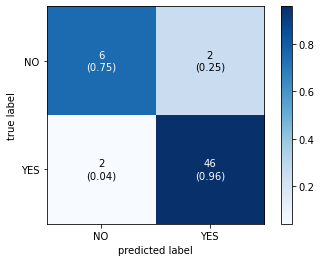

In [114]:
plot_confusion_matrix_heatmap(bagging_opt_cm, "bagging_opt_cm")

### Algorithm 10: NeuralNet

In [115]:
model = Sequential([Dense(32, activation='relu', kernel_initializer='he_uniform', input_shape=(X_train_scaled.shape[-1],)),
                    Dense(100, activation='relu', kernel_initializer='he_uniform'),
                    Dense(64, activation='relu', kernel_initializer='he_uniform'),
                    Dense(1, activation='sigmoid')
                   ]
                  )
model.summary()

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Train the model
history = model.fit(X_train_scaled, y_train, batch_size=64, epochs=100, 
                    validation_data=(X_test_scaled,y_test))

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 32)                512       
                                                                 
 dense_1 (Dense)             (None, 100)               3300      
                                                                 
 dense_2 (Dense)             (None, 64)                6464      
                                                                 
 dense_3 (Dense)             (None, 1)                 65        
                                                                 
Total params: 10,341
Trainable params: 10,341
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
4/4 [==============================] - 1s 48ms/step - loss: 0.6571 - accuracy: 0.5864 - val_loss: 0.5784 - val_accuracy: 0.8214
Epoch 2/100
4/4 [===========================

Epoch 53/100
4/4 [==============================] - 0s 6ms/step - loss: 0.0558 - accuracy: 0.9818 - val_loss: 0.3579 - val_accuracy: 0.9107
Epoch 54/100
4/4 [==============================] - 0s 7ms/step - loss: 0.0543 - accuracy: 0.9818 - val_loss: 0.3587 - val_accuracy: 0.9107
Epoch 55/100
4/4 [==============================] - 0s 7ms/step - loss: 0.0533 - accuracy: 0.9818 - val_loss: 0.3621 - val_accuracy: 0.9107
Epoch 56/100
4/4 [==============================] - 0s 6ms/step - loss: 0.0518 - accuracy: 0.9818 - val_loss: 0.3673 - val_accuracy: 0.9107
Epoch 57/100
4/4 [==============================] - 0s 6ms/step - loss: 0.0510 - accuracy: 0.9818 - val_loss: 0.3747 - val_accuracy: 0.9107
Epoch 58/100
4/4 [==============================] - 0s 6ms/step - loss: 0.0502 - accuracy: 0.9773 - val_loss: 0.3791 - val_accuracy: 0.9107
Epoch 59/100
4/4 [==============================] - 0s 6ms/step - loss: 0.0501 - accuracy: 0.9773 - val_loss: 0.3796 - val_accuracy: 0.9107
Epoch 60/100
4/4 [==

In [116]:
nn_test_pred = model.predict(X_test_scaled).round()
all_scores_dict['NN'], nn_cm = evaluate_model(y_test, nn_test_pred, 'TEST')

2/2 [==============================] - 0s 967us/step

==========================TEST=====================================
confusion matrix: 
 [[ 6  2]
 [ 3 45]]

Accuracy: 0.911
Precision: 0.957
Sensitivity/recall: 0.938
Specificity: 0.750
Balanced Accuracy: 0.844
F1 score: 0.947
Classification report: 
               precision    recall  f1-score   support

          NO       0.67      0.75      0.71         8
         YES       0.96      0.94      0.95        48

    accuracy                           0.91        56
   macro avg       0.81      0.84      0.83        56
weighted avg       0.92      0.91      0.91        56



In [117]:
# define model
reg_param = 0.003
initializer = tf.keras.initializers.HeUniform(seed=46)
opt_model = Sequential(
                [Dense(64,activation='relu', kernel_initializer=initializer, input_shape=(X_train_scaled.shape[-1],),
                       kernel_regularizer = regularizers.l1(reg_param)),
                 Dense(128,activation='relu', kernel_initializer=initializer, kernel_regularizer = regularizers.l1(reg_param)),
                 Dropout(0.15),
                 Dense(64,activation='relu', kernel_initializer=initializer, kernel_regularizer = regularizers.l1(reg_param)),
                 Dense(16,activation='relu', kernel_initializer=initializer, kernel_regularizer = regularizers.l1(reg_param)),
                 Dropout(0.15),
                 Dense(1, activation='sigmoid')
                 ]
                    )

# compile model
opt_model.compile(optimizer=Adam(learning_rate = 0.008), 
              loss='binary_crossentropy', 
              metrics=['accuracy'])

# train model
history = opt_model.fit(X_train_scaled, y_train, epochs=50, 
                    validation_data=(X_test_scaled,y_test))

Epoch 1/50
7/7 [==============================] - 1s 23ms/step - loss: 8.0835 - accuracy: 0.7636 - val_loss: 7.1847 - val_accuracy: 0.8571
Epoch 2/50
7/7 [==============================] - 0s 4ms/step - loss: 6.5579 - accuracy: 0.8636 - val_loss: 5.8775 - val_accuracy: 0.8571
Epoch 3/50
7/7 [==============================] - 0s 4ms/step - loss: 5.3531 - accuracy: 0.8773 - val_loss: 4.7471 - val_accuracy: 0.8571
Epoch 4/50
7/7 [==============================] - 0s 4ms/step - loss: 4.3206 - accuracy: 0.8773 - val_loss: 3.7966 - val_accuracy: 0.8750
Epoch 5/50
7/7 [==============================] - 0s 4ms/step - loss: 3.4630 - accuracy: 0.9000 - val_loss: 3.0758 - val_accuracy: 0.8750
Epoch 6/50
7/7 [==============================] - 0s 4ms/step - loss: 2.8040 - accuracy: 0.9045 - val_loss: 2.4820 - val_accuracy: 0.9107
Epoch 7/50
7/7 [==============================] - 0s 4ms/step - loss: 2.2794 - accuracy: 0.9000 - val_loss: 2.0224 - val_accuracy: 0.9107
Epoch 8/50
7/7 [=================

In [118]:
opt_nn_test_pred = opt_model.predict(X_test_scaled).round()
all_scores_dict['NN_opt'], nn_opt_cm = evaluate_model(y_test, opt_nn_test_pred, 'TEST')

2/2 [==============================] - 0s 999us/step

==========================TEST=====================================
confusion matrix: 
 [[ 8  0]
 [ 2 46]]

Accuracy: 0.964
Precision: 1.000
Sensitivity/recall: 0.958
Specificity: 1.000
Balanced Accuracy: 0.979
F1 score: 0.979
Classification report: 
               precision    recall  f1-score   support

          NO       0.80      1.00      0.89         8
         YES       1.00      0.96      0.98        48

    accuracy                           0.96        56
   macro avg       0.90      0.98      0.93        56
weighted avg       0.97      0.96      0.97        56



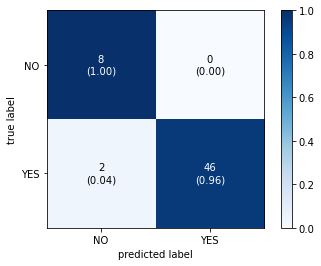

In [119]:
plot_confusion_matrix_heatmap(nn_opt_cm, "nn_opt_cm")

# Summary of Result

In [121]:
metric_score_indices = ['Accuracy', 'Precision', 'Recall', 'Specificity', 'Balanced Accuracy', 'F1 score']
score_df = pd.DataFrame(all_scores_dict,index=metric_score_indices).T.round(3)

In [122]:
score_df

Accuracy  Precision  Recall  Specificity  Balanced Accuracy  \
SVC             0.857      0.885   0.958        0.250              0.604   
SVC_opt         0.929      0.978   0.938        0.875              0.906   
LR              0.893      0.920   0.958        0.500              0.729   
LR_opt          0.911      0.939   0.958        0.625              0.792   
KNN             0.893      0.904   0.979        0.375              0.677   
KNN_opt         0.929      1.000   0.917        1.000              0.958   
RF              0.929      0.958   0.958        0.750              0.854   
RF_opt          0.929      0.978   0.938        0.875              0.906   
GBoosting       0.875      0.918   0.938        0.500              0.719   
GB_opt          0.911      0.939   0.958        0.625              0.792   
NB              0.893      0.920   0.958        0.500              0.729   
NB_opt          0.911      0.922   0.979        0.500              0.740   
LDA             0.929      0.940   0.979        0.625              0.802   
LDA_opt         0.929      0.940   0.979        0.625              0.802   
DT              0.911      0.978   0.917        0.875              0.896   
DT_opt          0.911      0.978   0.917        0.875              0.896   
Bagging         0.929      0.978   0.938        0.875              0.906   
Bagging_opt     0.929      0.958   0.958        0.750              0.854   
NN              0.911      0.957   0.938        0.750              0.844   
NN_opt          0.964      1.000   0.958        1.000              0.979   

             F1 score  
SVC             0.920  
SVC_opt         0.957  
LR              0.939  
LR_opt          0.948  
KNN             0.940  
KNN_opt         0.957  
RF              0.958  
RF_opt          0.957  
GBoosting       0.928  
GB_opt          0.948  
NB              0.939  
NB_opt          0.949  
LDA             0.959  
LDA_opt         0.959  
DT              0.946  
DT_opt          0.946  
Bagging         0.957  
Bagging_opt     0.958  
NN              0.947  
NN_opt          0.979

In [123]:
score_df[~score_df.index.str.contains('opt', regex=False)]

Accuracy  Precision  Recall  Specificity  Balanced Accuracy  \
SVC           0.857      0.885   0.958        0.250              0.604   
LR            0.893      0.920   0.958        0.500              0.729   
KNN           0.893      0.904   0.979        0.375              0.677   
RF            0.929      0.958   0.958        0.750              0.854   
GBoosting     0.875      0.918   0.938        0.500              0.719   
NB            0.893      0.920   0.958        0.500              0.729   
LDA           0.929      0.940   0.979        0.625              0.802   
DT            0.911      0.978   0.917        0.875              0.896   
Bagging       0.929      0.978   0.938        0.875              0.906   
NN            0.911      0.957   0.938        0.750              0.844   

           F1 score  
SVC           0.920  
LR            0.939  
KNN           0.940  
RF            0.958  
GBoosting     0.928  
NB            0.939  
LDA           0.959  
DT            0.946  
Bagging       0.957  
NN            0.947

In [124]:
score_df[score_df.index.str.contains('opt', regex=False)]

Accuracy  Precision  Recall  Specificity  Balanced Accuracy  \
SVC_opt         0.929      0.978   0.938        0.875              0.906   
LR_opt          0.911      0.939   0.958        0.625              0.792   
KNN_opt         0.929      1.000   0.917        1.000              0.958   
RF_opt          0.929      0.978   0.938        0.875              0.906   
GB_opt          0.911      0.939   0.958        0.625              0.792   
NB_opt          0.911      0.922   0.979        0.500              0.740   
LDA_opt         0.929      0.940   0.979        0.625              0.802   
DT_opt          0.911      0.978   0.917        0.875              0.896   
Bagging_opt     0.929      0.958   0.958        0.750              0.854   
NN_opt          0.964      1.000   0.958        1.000              0.979   

             F1 score  
SVC_opt         0.957  
LR_opt          0.948  
KNN_opt         0.957  
RF_opt          0.957  
GB_opt          0.948  
NB_opt          0.949  
LDA_opt         0.959  
DT_opt          0.946  
Bagging_opt     0.958  
NN_opt          0.979

# Feature Importance using Random Forest model

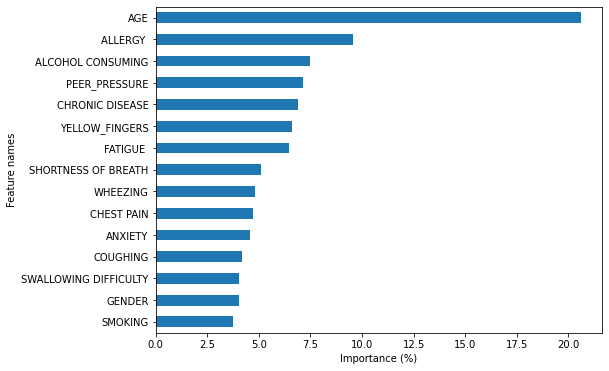

In [125]:
fig, ax = plt.subplots()
(pd.Series(rf_model.feature_importances_*100, index=X_test_scaled.columns).sort_values().plot(kind='barh', 
                                                                                              figsize=(8,8), ax=ax))
fig.set_size_inches(8, 6)
# plt.title("Plot of Feature Importance")
plt.xlabel("Importance (%)")
plt.ylabel("Feature names")
plt.savefig('feature_importance.jpeg',bbox_inches='tight')
plt.show()

In [131]:
m1 = score_df[score_df.index.str.contains('opt', regex=False)].iloc[-1]
m2 = score_df[~score_df.index.str.contains('opt', regex=False)].iloc[-1]

In [136]:
(m1-m2)*100

Accuracy              5.3
Precision             4.3
Recall                2.0
Specificity          25.0
Balanced Accuracy    13.5
F1 score              3.2
dtype: float64